# Assignment 2

Annalaura Ianiro

Alan Kwan

David Ordóñez Vivar

We will use the data from this competition https://www.drivendata.org/competitions/1/united-nations-millennium-development-goals/.

1. Load the data from the competition, removing any possible meaningless column.
2. The "Series Code" column contains codes with segments separated by periods ".". Suppose that the first segment represents some global "category". How many unique categories are?
3. Write a function that receives a country name and returns a pandas DataFrame indexed by year with all the series as columns. Write another similar function that receives a series name and returns the countries.
4. Plot the "Alternative and nuclear energy (% of total energy use)" of your three countries in the same plot, as well as a centered, 3 year rolling mean.
5. Which are the 8 countries with the largest "Electricity production from coal sources (kWh)"? Plot the series for those 8 countries.
6. Among the countries that had a nonzero "Electricity production from coal sources (kWh)" in each of the last 5 years of the dataset, which are the 8 ones that had the biggest percentual increase in those last 5 years? Plot the series for those 8 countries.
7. Pick some health or development indicators of your choice. "Is the world doing better or worse?". Discuss, compare different countries and/or continents, correlate with other indexes.



## 1. Load the data from the competition, removing any possible meaningless column. 

First of all we import all the needed libraries and upload the dataframe.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dev_goals = pd.read_csv("/home/al1190/Desktop/dsf/Assignments/UN_data/TrainingSet.csv")
dev_goals.head()

,Unnamed: 0,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],...,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.244887,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.933105,Afghanistan,allsi.gen_pop,(%) Generosity of All Social Insurance
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.996814,Afghanistan,allsp.gen_pop,(%) Generosity of All Social Protection


We eliminate the series "Unnamed: 0": it cannot be used as an index because it skips some value. Then, we also eliminate the square brakets part from the column names with the year.

In [3]:
dev_goals = dev_goals.drop(columns = "Unnamed: 0")
dev_goals.columns = dev_goals.columns.str.replace(r"\[.*\]","")
dev_goals.head()

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2001,2002,2003,2004,2005,2006,2007,Country Name,Series Code,Series Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.244887,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.933105,Afghanistan,allsi.gen_pop,(%) Generosity of All Social Insurance
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.996814,Afghanistan,allsp.gen_pop,(%) Generosity of All Social Protection


## 2. The "Series Code" column contains codes with segments separated by periods ".". Suppose that the first segment represents some global "category". How many unique categories are?

In [4]:
dev_goals["Series Code"].str.split(".", expand = True)[0].nunique()


62

We use the command str.split() to split the series codes where a dot is; then, taking the first column of the splitted series (in position 0), we use .nunique() to compute the number of unique values in it.

## 3. Write a function that receives a country name and returns a pandas DataFrame indexed by year with all the series as columns. Write another similar function that receives a series name and returns the countries.

As it is, the database is not easy to work with. It is difficult to have a comprehensive view of a specific counrty or of a specific indicator. Therefore, it can be useful to create two functions, which transform the dataframe into a new one easier to manage and more informative.

In [5]:
def country_data(country):
    """
Returns a properly formatted dataframe with the time series related to the input country, 
with the years as row indexes and the series names as columns names.

Parameters
----------
country : string
    Country whose time series we want to retrieve.

Returns
-------
country_df: pandas.core.frame.DataFrame
    Dataframe contaning the time series of all the indicators for the input country.
    
    """
    mask = dev_goals["Country Name"] == country #filter for the input country
    #creating the new df with Series Name as the column index (it becomes so after transposing)
    country_df = dev_goals.loc[mask, :].set_index("Series Name").transpose() 
    country_df.columns.name = country
    country_df = country_df.drop(["Country Name", "Series Code"])#eliminating redundant information
    #parsing the index into a datetime object
    country_df.index = pd.to_datetime(country_df.index).year
    country_df.index.name = "Year"
    #converting the df elements into an appropriate data type.
    country_df = country_df.apply(pd.to_numeric, errors='ignore')
    return country_df

In [6]:
it = country_data("Italy")
it.head()

Italy,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",Achieve universal primary education,"Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2005 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2005 US$),...,"Water pollution, clay and glass industry (% of total BOD emissions)","Water pollution, food industry (% of total BOD emissions)","Water pollution, metal industry (% of total BOD emissions)","Water pollution, other industry (% of total BOD emissions)","Water pollution, paper and pulp industry (% of total BOD emissions)","Water pollution, textile industry (% of total BOD emissions)","Water pollution, wood industry (% of total BOD emissions)","Water productivity, total (constant 2005 US$ GDP per cubic meter of total freshwater withdrawal)",Wholesale price index (2010 = 100),Women's share of population ages 15+ living with HIV (%)
Year,,,,,,,,,,,,,,,,,,,,,
1972,NaN,NaN,NaN,NaN,NaN,3.957411,7.540494e+11,1.243784e+11,3.368904,13865.957237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.997658,NaN,NaN
1973,NaN,NaN,0.994883,NaN,NaN,4.030546,7.844417e+11,1.493397e+11,3.327410,14327.334552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974,NaN,NaN,NaN,NaN,NaN,1.196489,7.938275e+11,1.668833e+11,0.536433,14404.191047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975,NaN,NaN,NaN,NaN,NaN,-1.738383,7.800277e+11,1.877145e+11,-2.323499,14069.509816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976,NaN,NaN,0.977554,98.44185,97.1008,6.292828,8.291135e+11,1.858103e+11,5.763906,14880.463067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


When transposing a dataframe with .transpose(), if the data types of the series are not the same, the function set the data type of the transposed dataframe equal to object. With the last line of the function, we use the command pd.to_numeric() to convert the data type into an appropriate one.

In [7]:
it.dtypes

Italy
2005 PPP conversion factor, GDP (LCU per international $)                                           float64
2005 PPP conversion factor, private consumption (LCU per international $)                           float64
Achieve universal primary education                                                                 float64
Adjusted net enrollment rate, primary, female (% of primary school age children)                    float64
Adjusted net enrollment rate, primary, male (% of primary school age children)                      float64
Adjusted net national income (annual % growth)                                                      float64
Adjusted net national income (constant 2005 US$)                                                    float64
Adjusted net national income (current US$)                                                          float64
Adjusted net national income per capita (annual % growth)                                           float64
Adjusted net national 

The function below follows the same logic of the previous one. We simply changed the input.

In [8]:
def series_data(series_name):
    """
Returns a properly formatted dataframe with the time series related to the input series name for all countries, 
with the years as row indexes and the countries as columns names.

Parameters
----------
series_name : string
    Name of the series whose value we want to retrieve for all the countries.

Returns
-------
series_df: pandas.core.frame.DataFrame
    Dataframe contaning the time series of all the countries for the input series name.
    
    """
    mask = dev_goals["Series Name"] == series_name #filter for the input country
    #creating the new df with Country Name as the column index (it becomes so after transposing)
    series_df = dev_goals.loc[mask, :].set_index("Country Name").transpose()
    series_df.columns.name = series_name
    series_df = series_df.drop([ "Series Name", "Series Code"]) #eliminating redundant information
    #parsing the index into a datetime object
    series_df.index = pd.to_datetime(series_df.index).year
    series_df.index.name = "Year"
    #converting the df elements into an appropriate data type
    series_df = series_df.apply(pd.to_numeric, errors='ignore') 
    return series_df

In [9]:
adj_nni = series_data("Adjusted net national income (annual % growth)")
adj_nni.head()

Adjusted net national income (annual % growth),Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,"Venezuela, RB",Vietnam,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1972,NaN,21.475738,NaN,-0.715529,NaN,5.705325,6.589558,NaN,NaN,NaN,...,NaN,NaN,2.623016,5.501396,-1.125212,NaN,NaN,NaN,6.590783,NaN
1973,NaN,4.718686,NaN,5.731270,NaN,5.371589,5.838566,NaN,NaN,NaN,...,NaN,NaN,4.767392,5.741941,-4.158508,NaN,NaN,NaN,-12.905622,NaN
1974,NaN,26.300898,NaN,3.198521,NaN,2.640340,2.286316,NaN,NaN,NaN,...,NaN,NaN,-6.106959,-3.998096,2.929075,NaN,NaN,NaN,9.842705,NaN
1975,NaN,1.913998,NaN,0.323304,NaN,0.784712,-0.311799,NaN,NaN,NaN,...,NaN,NaN,0.479577,-0.849639,1.748012,NaN,25.546961,NaN,-14.180232,NaN
1976,NaN,8.210002,NaN,-3.378993,NaN,2.401618,4.469643,NaN,NaN,NaN,...,NaN,NaN,2.097993,5.192781,4.912213,NaN,11.866161,NaN,-4.858429,NaN


In [10]:
adj_nni.describe()

Adjusted net national income (annual % growth),Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,"Venezuela, RB",Vietnam,Zambia,Zimbabwe
count,16.000000,36.000000,7.000000,35.000000,17.000000,36.000000,36.000000,13.000000,18.000000,5.000000,...,17.000000,6.000000,36.000000,36.000000,36.000000,12.000000,33.000000,18.000000,36.000000,31.000000
mean,10.061135,4.824667,158.091132,1.253571,4.699348,2.972719,2.550473,12.653957,2.734477,6.987908,...,-1.604982,7.381912,2.596038,3.052864,1.801499,5.671211,5.018717,6.808229,2.331821,0.239706
std,16.469799,8.025084,463.739464,8.367659,16.998274,1.785507,1.806531,20.402683,14.385032,14.966206,...,12.421031,5.821151,2.763879,2.577469,6.099008,35.916911,10.914233,5.760881,10.100819,7.521724
min,-28.235848,-8.512932,-109.181115,-19.036053,-58.207446,-0.476072,-1.115576,-17.518490,-34.187254,-11.171890,...,-26.267750,-0.149509,-6.106959,-3.998096,-13.321731,-41.738131,-19.752533,-9.001404,-20.552962,-18.597169
25%,5.979071,0.655536,-19.021998,-5.188694,4.411348,2.206864,1.237097,-6.129785,-2.335141,-4.737623,...,-12.931516,3.911355,1.042561,1.489024,-1.898933,-11.401454,-2.070093,4.587879,-4.161827,-5.157976
50%,9.089048,3.752540,-3.135898,1.942683,8.848127,2.570877,2.875025,11.223117,1.005149,7.620516,...,-1.088667,8.128020,3.062012,3.622239,2.526802,7.177526,5.435028,8.319211,2.495859,1.371226
75%,15.438780,7.623601,26.288571,6.972009,13.667277,4.482433,3.511346,25.715028,5.533128,21.154967,...,8.621044,8.759812,4.472627,4.536008,6.482586,11.732266,11.866161,9.586552,9.803018,4.940315
max,50.529087,26.300898,1204.421795,17.587931,15.362880,6.314003,6.589558,51.902413,34.322392,22.073570,...,15.203322,16.708735,6.701696,8.808895,14.279147,86.592720,27.007818,14.319703,22.249719,15.924219


## 4. Plot the "Alternative and nuclear energy (% of total energy use)" of your three countries in the same plot, as well as a centered, 3 year rolling mean.

We use the previously created function, series_data() to retrieve the cross-country time series related to the indicator of interest.

In [11]:
nuc_en = series_data("Alternative and nuclear energy (% of total energy use)")

Then, we take the subset of our three countries: Italy, Spain and United States.

In [12]:
sub_set = nuc_en.loc[:, ["Italy", "Spain", "United States"]]

In [13]:
%matplotlib inline

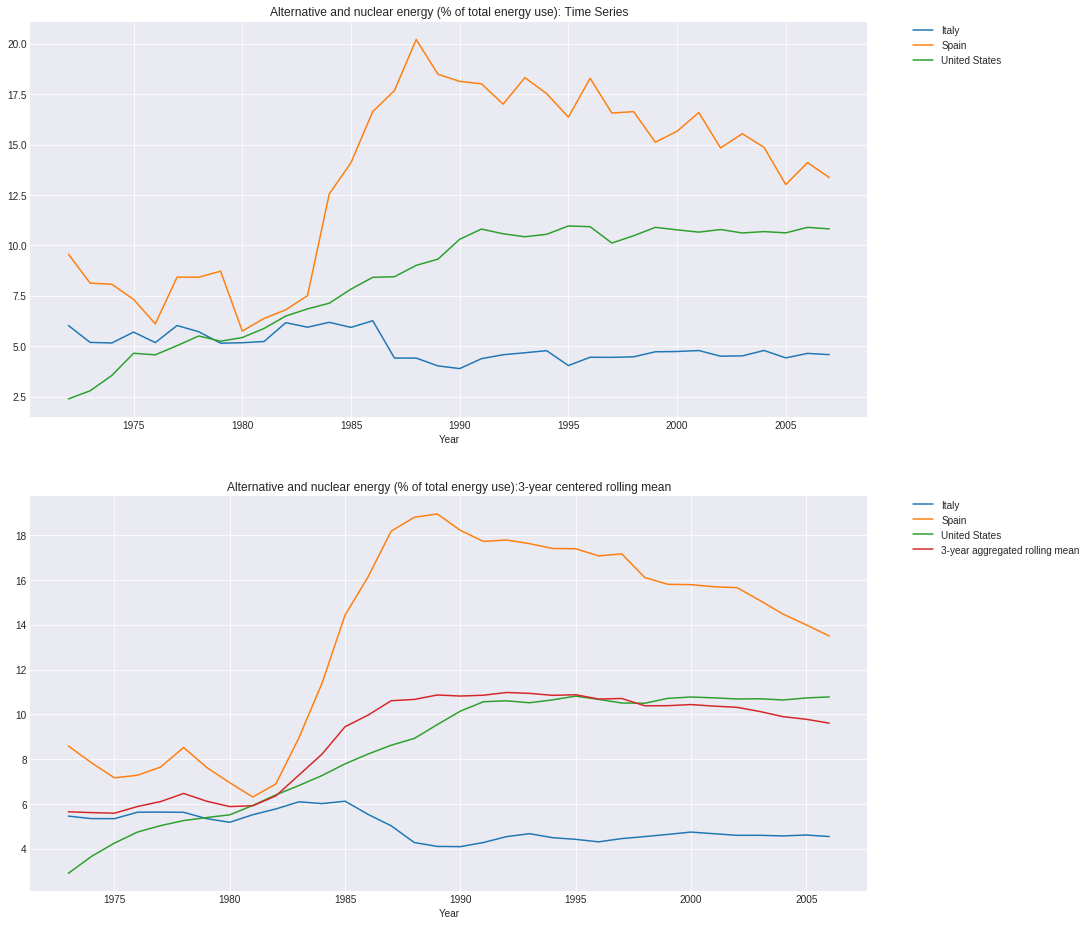

In [14]:
plt.style.use('seaborn-darkgrid')
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (15,16))
fig.subplots_adjust(hspace = .2) #spacing the graphs from each other
#plotting the raw time series
sub_set.plot(ax = ax1, title = "Alternative and nuclear energy (% of total energy use): Time Series").legend(
    bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad = 0); 
#plotting the 3-year centered rolling mean of each country.
sub_set.rolling(3, center = True).mean().plot(ax = ax2, 
                title = "Alternative and nuclear energy (% of total energy use):3-year centered rolling mean");
#plotting the aggregated 3-year centered rolling mean.
sub_set.mean(axis=1).rolling(3, center = True).mean().plot(ax = ax2).legend(
    ["Italy", "Spain", "United States", "3-year aggregated rolling mean"],
    bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad = 0);

The two graphs show the same dynamic, with the rolling mean smoothing the series. Some facts:
    
   1) In Italy, the decline observed starting 1985 can be explained by the result of a referendum on nuclear energy (in 1987), which banned nuclear power plants from the country. Since 1990, in Italy there have been no functioning nuclear power plants. As far as other alternative energies are concerned, it seems their usage has been constant. Italy energy demand is heavily reliant on Russian gas.
   
   2) In the 80s, Spanish companies increased their use of nuclear energy for their needs, relying on the Third Generation nuclear plants (Vandellós II and Trillo), built in those years. In 1985, the National Company of Radioactive Waste (ENRESA) was also created, in charge of the management of nuclear power plants. As we can see, this trend is reflected in our graph, with a high increase in the usage of alternative and nuclear energy observed starting from the 80s. 
   
   3) Starting in 1979 (until 2012) the US stopped commissioning new nuclear power stations after the Three Mile Island disaster.  Over the next 10 years, however, nuclear production still increased because previously licensed new plants came online and existing plants were upgraded to operate at higher capacity and with less downtime.  Since the early 1990s, more nuclear plant have been decommissioned (largely due to greater economic viability of natural gas and renewables), but continuing upgrades of existing plants have balanced the lost capacity. Regarding other alternative energy, non-hydro renewable energies have increased over this time period, while hydopower has remained stable (as new large dams have not been approved since the 1970s due to expense and environmental concerns).  The impact of these energies is less apparent in the chart because they constitute less than half the production of nuclear energy, and total electricity consumption has increased, which means the share of electricity consumption from these alternative energies has remained largely flat even if its overall output has increased.  Therefore, the trends seen in the data reflect mostly changes in nuclear power.


## 5. Which are the 8 countries with the largest "Electricity production from coal sources (kWh)"? Plot the series for those 8 countries.

First of all, we use the series_data() function to retrieve the necessary information.

In [15]:
el_prod = series_data("Electricity production from coal sources (kWh)")
el_prod.head()

Electricity production from coal sources (kWh),Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,"Venezuela, RB",Vietnam,"Yemen, Rep.",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1972,NaN,NaN,NaN,615000000.0,NaN,3.997900e+10,3.337000e+09,NaN,NaN,NaN,...,NaN,1.452410e+11,8.249700e+11,NaN,NaN,NaN,1.778000e+09,NaN,203000000.0,7.480000e+08
1973,NaN,NaN,NaN,631000000.0,NaN,4.823300e+10,3.189000e+09,NaN,NaN,NaN,...,NaN,1.746090e+11,9.073600e+11,NaN,NaN,NaN,1.930000e+09,NaN,226000000.0,1.685000e+09
1974,NaN,NaN,NaN,678000000.0,NaN,4.717900e+10,3.355000e+09,NaN,NaN,NaN,...,NaN,1.488310e+11,8.646820e+11,NaN,NaN,NaN,1.650000e+09,NaN,214000000.0,6.490000e+08
1975,NaN,NaN,NaN,650000000.0,NaN,5.063900e+10,2.798000e+09,NaN,NaN,NaN,...,NaN,1.694680e+11,8.908520e+11,NaN,NaN,NaN,1.928000e+09,NaN,229000000.0,8.110000e+08
1976,NaN,NaN,NaN,627000000.0,NaN,5.222500e+10,3.639000e+09,NaN,NaN,NaN,...,NaN,1.798670e+11,9.871130e+11,NaN,NaN,NaN,2.400000e+09,NaN,129000000.0,7.800000e+08


Finding the largest 8 electricity producers is not as trivial as it seems. Indeed, if there were one year observation (not a time series), we could easily find them. As well as it would be easy to find the 8 largest electricity producers in a specific year. With more than one year to take into account, it becomes more difficult, because the list can be different each year (i.e.: a country which was among the 8 largest electricity producer in year 1, might not be so in year 2). Therefore, we need to choose some criteria to sort the countries. 

### 1) Median
One way to establish the 8 largest electricity producer could be finding the 8 countries with the highest median electricity production across the years. Differently from a simple average, which could be biased by outliers, the median could give an accurate representation of the "middle" level of energy production across the years and can be used to compare the different country.

In [16]:
el_prod.median(axis = 0).nlargest(8)


Electricity production from coal sources (kWh)
United States         1.696168e+12
China                 4.255845e+11
Germany               3.034125e+11
India                 1.882870e+11
United Kingdom        1.703570e+11
Russian Federation    1.605440e+11
South Africa          1.519250e+11
Poland                1.312790e+11
dtype: float64

### 2) Aggregated production level
Another way could be comparing the aggregated production level over all years of each country.

In [17]:
el_prod.sum(axis = 0).nlargest(8)

Electricity production from coal sources (kWh)
United States     5.739054e+13
China             2.434389e+13
Germany           1.077732e+13
India             7.919573e+12
United Kingdom    6.004158e+12
South Africa      5.355493e+12
Japan             5.076713e+12
Poland            4.471038e+12
dtype: float64

In this case, the first five countries are the same ones obtained using the median. 

### 3) Mean
For completion, we check the mean as well.

In [18]:
el_prod.mean(axis = 0).nlargest(8)

Electricity production from coal sources (kWh)
United States         1.594182e+12
China                 6.762193e+11
Germany               2.993701e+11
India                 2.199881e+11
United Kingdom        1.667822e+11
Russian Federation    1.620837e+11
South Africa          1.487637e+11
Japan                 1.410198e+11
dtype: float64

The resulting list is the same as the median one, with only a difference in the last country.

The comparisons made above are based on the entirety of the time series. However, it could be interesting to focus on more recent years and see if the situation is still the same. 

### 4) 2007 production level
We choose the level of productionof the last year in the time series to find out the largest producers.

In [19]:
el_prod.iloc[-1, :].nlargest(8)

Electricity production from coal sources (kWh)
China            2.659622e+12
United States    2.118455e+12
India            5.419270e+11
Germany          3.103710e+11
Japan            3.093630e+11
South Africa     2.468380e+11
Australia        1.872240e+11
Korea, Rep.      1.707040e+11
Name: 2007, dtype: float64

The majority of the historical largest producers is still in the list, albeit in different positions, and there are some newcomers, as well. Since looking at only 2007 might not be informative enough, we took the median , the aggregated production level and the mean of the last 5 years of the time series for comparison.

### 5) Median of the last 5 years


In [20]:
el_prod.iloc[-5:, :].median(axis = 0).nlargest(8)

Electricity production from coal sources (kWh)
United States         2.118455e+12
China                 1.971772e+12
India                 4.739270e+11
Germany               3.057210e+11
Japan                 2.954250e+11
South Africa          2.290340e+11
Australia             1.816000e+11
Russian Federation    1.691280e+11
dtype: float64

### 6) Aggregated production level of the last 5 years

In [21]:
el_prod.iloc[-5:, :].sum(axis = 0).nlargest(8)

Electricity production from coal sources (kWh)
United States         1.057403e+13
China                 1.016946e+13
India                 2.422237e+12
Germany               1.543632e+12
Japan                 1.481108e+12
South Africa          1.157284e+12
Australia             9.049460e+11
Russian Federation    8.428110e+11
dtype: float64

### 7) Mean of the last 5 years

In [22]:
el_prod.iloc[-5:, :].mean(axis = 0).nlargest(8)

Electricity production from coal sources (kWh)
United States         2.114806e+12
China                 2.033892e+12
India                 4.844474e+11
Germany               3.087264e+11
Japan                 2.962216e+11
South Africa          2.314568e+11
Australia             1.809892e+11
Russian Federation    1.685622e+11
dtype: float64

The last three methods give us the same result. Therefore we choose these countries as the largest producers. In this way, we have a list reflecting the most recent status of the world. 

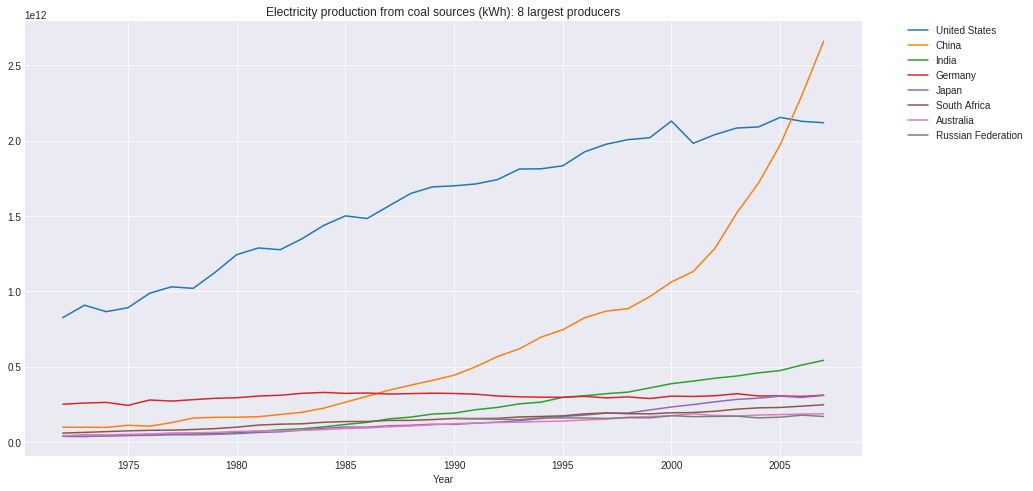

In [23]:
country_list = el_prod.iloc[-5:, :].median(axis = 0).nlargest(8).index
fig, ax = plt.subplots(figsize = (15,8))
el_prod.loc[:, country_list].plot(ax = ax, 
            title ="Electricity production from coal sources (kWh): 8 largest producers").legend(
            bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad = 0);

As it can be seen in the graph, United States and China have production levels significantly higher than the other countries'. Furthermore, China production level shows an exponential growth. Seeing this trend, as well as the US one, highlights the importance of reducing the usage of fossil fuels, such as coal, to fight climate change. 

## 6. Among the countries that had a nonzero "Electricity production from coal sources (kWh)" in each of the last 5 years of the dataset, which are the 8 ones that had the biggest percentual increase in those last 5 years? Plot the series for those 8 countries.

Firstof all, we need to filter the database to exclude the country that in the last 5 years had  missing values (NaN) or zeroes in the time series.

In [24]:
filter1 = el_prod.iloc[-5:,:].isnull().sum() == 0 #filter the series without NaN 
filter2 = el_prod.iloc[-5:,:].all() == True #filter the series without zeroes
el_prod_filtered = el_prod.loc[:, (filter1 & filter2)]
el_prod_filtered.tail()

Electricity production from coal sources (kWh),Argentina,Australia,Austria,Belgium,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Canada,Chile,...,Tanzania,Thailand,Turkey,Ukraine,United Kingdom,United States,Uzbekistan,Vietnam,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2003,9.300000e+08,1.722490e+11,9.512000e+09,1.160800e+10,6.628000e+09,695000000.0,9.093000e+09,1.946200e+10,1.126320e+11,4.878000e+09,...,73000000.0,1.936900e+10,3.225200e+10,5.464300e+10,1.398420e+11,2.083326e+12,2.018000e+09,7.237000e+09,16000000.0,3.440000e+09
2004,1.670000e+09,1.785720e+11,9.109000e+09,1.148100e+10,6.617000e+09,736000000.0,1.058200e+10,1.910700e+10,1.012560e+11,7.718000e+09,...,86000000.0,2.060500e+10,3.444800e+10,4.512800e+10,1.332680e+11,2.090495e+12,2.043000e+09,7.173000e+09,12000000.0,4.197000e+09
2005,2.172000e+09,1.816000e+11,8.486000e+09,1.049300e+10,6.463000e+09,861000000.0,1.074200e+10,1.862500e+10,1.099840e+11,7.212000e+09,...,41000000.0,2.052200e+10,4.319200e+10,5.001300e+10,1.363360e+11,2.153956e+12,2.009000e+09,1.217300e+10,16000000.0,4.435000e+09
2006,1.986000e+09,1.853010e+11,8.412000e+09,9.216000e+09,7.293000e+09,860000000.0,1.050000e+10,1.920600e+10,1.081470e+11,1.059900e+10,...,24000000.0,2.530900e+10,4.665000e+10,6.494200e+10,1.504800e+11,2.127796e+12,2.081000e+09,1.411200e+10,7000000.0,2.735000e+09
2007,2.328000e+09,1.872240e+11,7.647000e+09,8.327000e+09,7.627000e+09,720000000.0,1.009800e+10,2.246300e+10,1.157250e+11,1.325900e+10,...,36000000.0,3.076800e+10,5.343100e+10,6.710100e+10,1.374910e+11,2.118455e+12,2.000000e+09,1.461800e+10,1000000.0,2.297000e+09


Then, we compute the last 5-year growth rate. 

In [25]:
el_prod_pct = el_prod_filtered.iloc[-5:,:].pct_change(4)
el_prod_pct

Electricity production from coal sources (kWh),Argentina,Australia,Austria,Belgium,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Canada,Chile,...,Tanzania,Thailand,Turkey,Ukraine,United Kingdom,United States,Uzbekistan,Vietnam,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,1.503226,0.086938,-0.196068,-0.28265,0.150724,0.035971,0.110525,0.154198,0.027461,1.718122,...,-0.506849,0.588518,0.656672,0.227989,-0.016812,0.016862,-0.00892,1.019898,-0.9375,-0.332267


Finally, we find the 8 countries with the largest growth rate.

In [26]:
el_prod_pct.iloc[-1].nlargest(8)

Electricity production from coal sources (kWh)
Namibia      9.083333
Chile        1.718122
Argentina    1.503226
Vietnam      1.019898
Malaysia     0.824014
China        0.751248
Turkey       0.656672
Thailand     0.588518
Name: 2007, dtype: float64

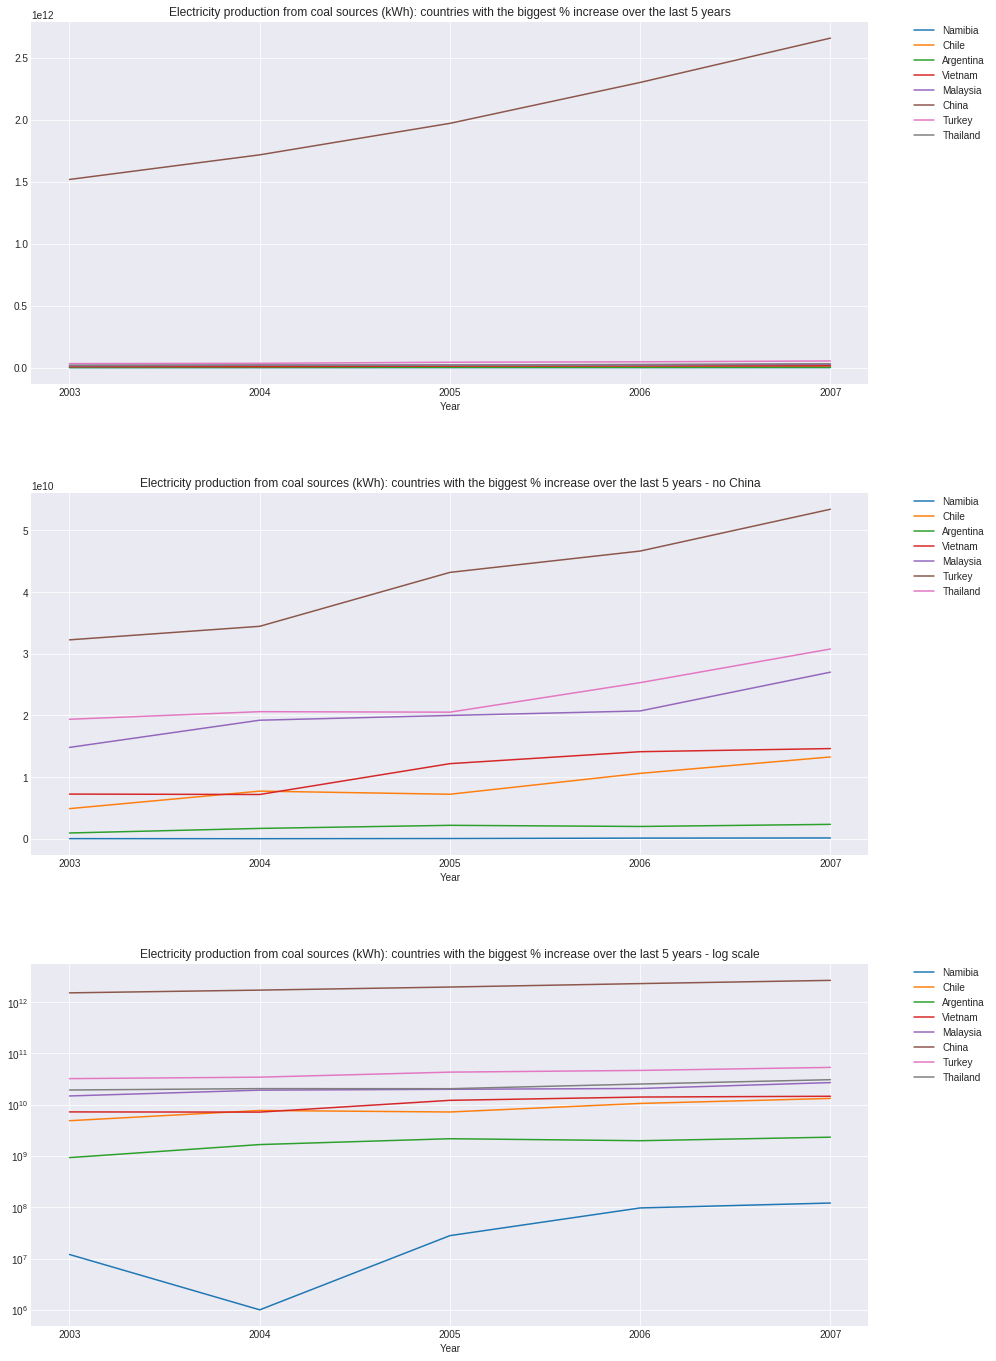

In [27]:
country_list = el_prod_pct.iloc[-1].nlargest(8).index
country_list_no_china = country_list.drop("China")

fig, ax = plt.subplots(nrows = 3, figsize = (15,24))
fig.subplots_adjust(hspace = .3) #spacing the graphs from each other

el_prod_filtered.loc[2003:, country_list].plot(xticks = [2003, 2004, 2005, 2006, 2007], ax = ax[0],
    title = "Electricity production from coal sources (kWh): countries with the biggest % increase over the last 5 years",).legend(
    bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad = 0);

el_prod_filtered.loc[2003:, country_list_no_china].plot(xticks = [2003, 2004, 2005, 2006, 2007], ax = ax[1],
    title = "Electricity production from coal sources (kWh): countries with the biggest % increase over the last 5 years - no China").legend(
    bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad = 0);

el_prod_filtered.loc[2003:, country_list].plot(xticks = [2003, 2004, 2005, 2006, 2007], ax = ax[2], logy = True, 
    title = "Electricity production from coal sources (kWh): countries with the biggest % increase over the last 5 years - log scale").legend(
    bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad = 0);


Plotting the normal time series for these countries (first graph) shows a huge difference in scale between China and the rest. Therefore, in the second graph we plot them without China, to see them better, while in the third graph we use a logarithmic scale.

## 7. Pick some health or development indicators of your choice. "Is the world doing better or worse?". Discuss, compare different countries and/or continents, correlate with other indexes.

First of all, we need a list with all the available series in the dataset.

In [79]:
series_name = set(dev_goals["Series Name"])

In [89]:
series_name = sorted(series_name)
print(*series_name, sep='\n')

(%) Benefits held by 1st 20% population - All Social Insurance
(%) Benefits held by 1st 20% population - All Social Protection
(%) Benefits held by 1st 20% population - All Social Safety Nets
(%) Benefits held by 1st 20% population - Unemp benefits and ALMP
(%) Generosity of All Social Insurance
(%) Generosity of All Social Protection
(%) Generosity of All Social Safety Nets
(%) Generosity of Unemp benefits and ALMP
(%) Program participation - All Social Insurance
(%) Program participation - All Social Protection
(%) Program participation - All Social Safety Nets
(%) Program participation - Unemp benefits and ALMP
2005 PPP conversion factor, GDP (LCU per international $)
2005 PPP conversion factor, private consumption (LCU per international $)
ARI treatment (% of children under 5 taken to a health provider)
Achieve universal primary education
Adjusted net enrollment rate, primary, female (% of primary school age children)
Adjusted net enrollment rate, primary, male (% of primary school

One way we addressed this question is by examining the above list of series we chose a selection of them as indicators of sustainable development (many series we considered, such as HIV/AIDS prevalence, did not have enough data to draw meaningful conclusions).  Then, we plotted the mean of the indicators to see how the "average" country was changing over time, and also the interquartile range as an indicator of how equal (or unequal) countries were in their progress.

In [28]:
from scipy.stats import iqr

In [29]:
def series_plot(series_list):
    """
Returns the graphs of the mean and interquartile range across the years of all the countries of the world, 
for the input series names.

Parameters
----------
series_list : list
    List with the names of the series we want to study.

Returns
-------
graphs: 
    Graphs of the mean and interquartile range for the input series.
    """
    fig, ax = plt.subplots(nrows = len(series_list), ncols = 2,figsize = (20,(8*len(series_list))))
    fig.subplots_adjust(hspace = .3)
    
    for i, series in enumerate(series_list):
        df = series_data(series)
        df.mean(axis = 1).plot(ax = ax[i,0], title = series+": mean")
        df["iqr"] = iqr(df, axis = 1, nan_policy = "omit", keepdims = True)#computing the interquartile range
        df["iqr"].plot(ax = ax[i,1], title = series+": interquartile range")
    graphs = plt.show()    
    return graphs

In [136]:
series_list1 = [
    "School enrollment, primary, female (% gross)", 
    "Life expectancy at birth, total (years)", 
    "GDP per capita (constant 2005 US$)"
]

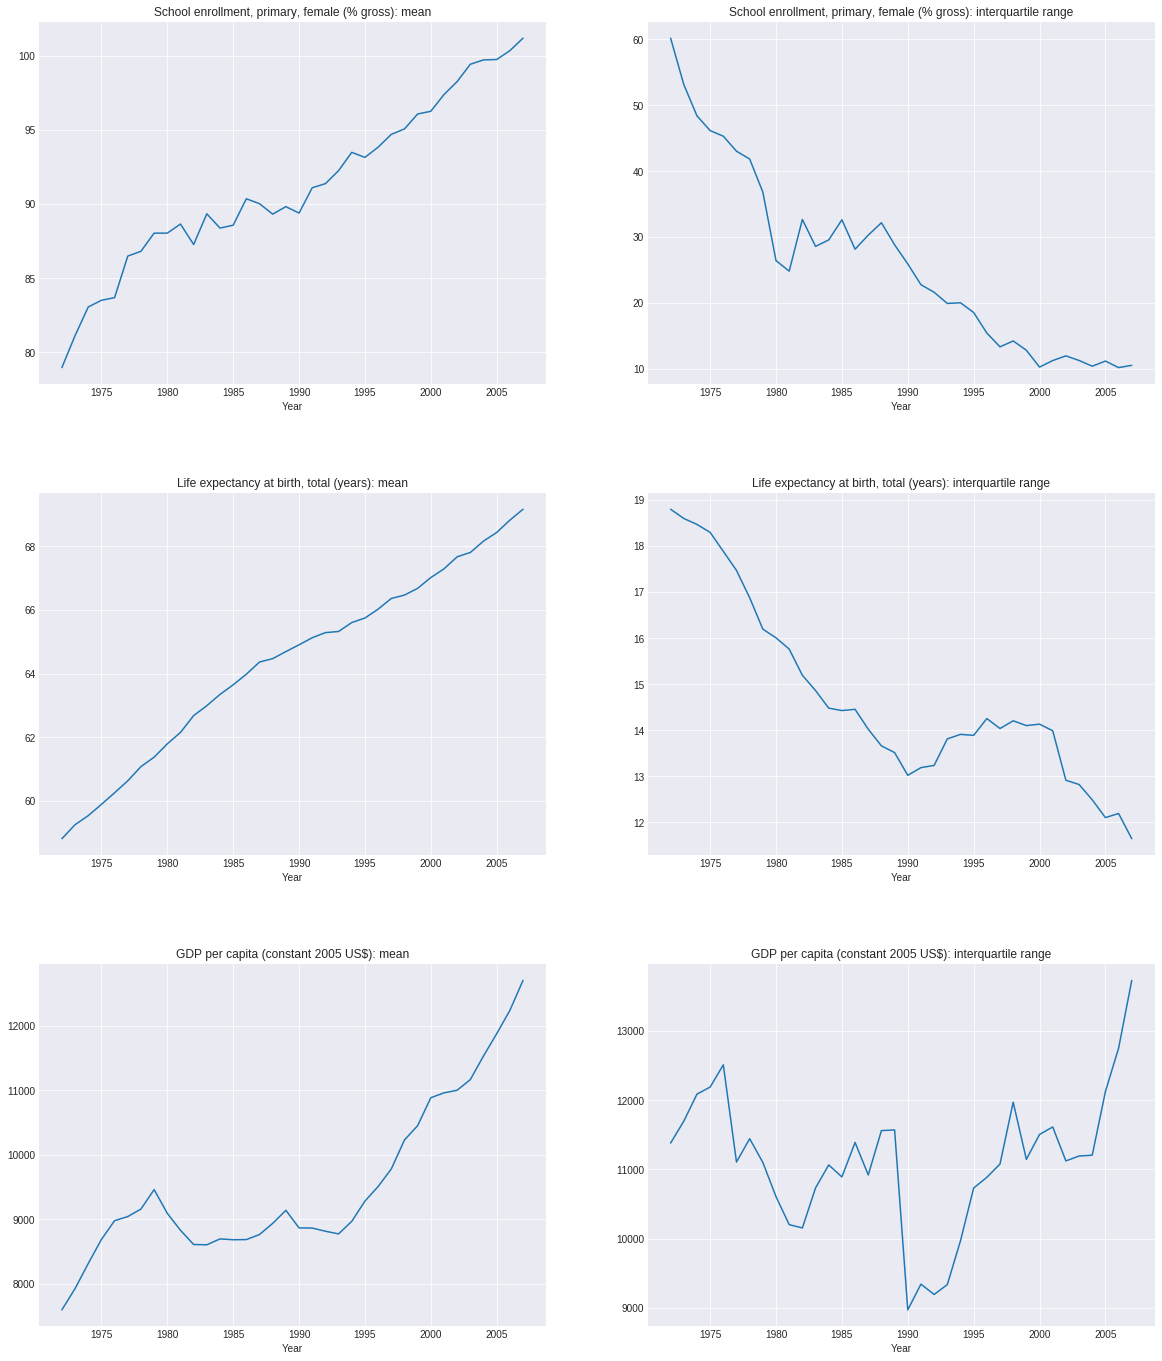

In [139]:
series_plot(series_list1)


School enrollment for females and life expectancy at birth show overall positive trends.  Not only is the average getting better, but the interquartile range has shrunk since the 1970's, indicating that the gap between countries is also reducing while the overall state is improving.  GDP shows a mixed trend.  Overall, the world is getting richer, but an increasing interquartile range (that exceeds the mean) indicates that inequality is also increasing, and that much of the GDP gains are concentrated in rich countries.

 

Limitations of this method include: 1) We include all countries, also those without complete datasets, so the values of each year might be coming from a different sized sample. However, excluding countries with NaN values would have eliminated the poorest country from the sample, making the analysis not representative for the whole world and bias our indicators to appearing better. 2) Every country is equally weighted in the mean and interquartile range calculation, so small countries have an impact on the calculation that's disproportionate to their population. It may be instructive to weight countries by population, but doing so will also make the indicators dominated by high-population countries and mask important trends.  It is therefore important to examine the data in different ways, cognizant of each methods pros and cons, before drawing firm conclusions.

 

### Correlation study
In this part we try to analyse the correlation among some indicators.


In [30]:
df_School_enrollment=series_data("School enrollment, primary, female (% gross)")
df_School_enrollment['School_enrollment']=df_School_enrollment.mean(axis=1)


In [31]:
df_Life_expectancy=series_data("Life expectancy at birth, total (years)")
df_Life_expectancy['Life_expectancy']=df_Life_expectancy.mean(axis=1)


In [32]:
df_GDP=series_data("GDP per capita (constant 2005 US$)")
df_GDP['GDP']=df_GDP.mean(axis=1)

In [33]:
df_Education_expenditure=series_data("Adjusted savings: education expenditure (current US$)")
df_Education_expenditure['Education_expenditure']=df_Education_expenditure.mean(axis=1)

In [34]:
df_child_mortality=series_data("Reduce child mortality")
df_child_mortality['child_mortality']=df_child_mortality.mean(axis=1)
df_child_mortality

Reduce child mortality,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe,child_mortality
Year,,,,,,,,,,,,,,,,,,,,,
1972,0.2960,NaN,0.2309,NaN,NaN,NaN,0.0701,NaN,0.0202,0.0280,...,0.0514,NaN,0.0983,0.0589,0.0809,NaN,0.2993,0.1700,0.1087,0.124417
1973,0.2909,NaN,0.2272,NaN,NaN,NaN,0.0684,NaN,0.0194,0.0268,...,0.0530,NaN,0.0939,0.0570,0.0791,NaN,0.2887,0.1651,0.1083,0.121172
1974,0.2852,NaN,0.2219,NaN,NaN,NaN,0.0661,NaN,0.0184,0.0251,...,0.0554,NaN,0.0900,0.0552,0.0775,NaN,0.2779,0.1610,0.1081,0.117319
1975,0.2798,NaN,0.2151,NaN,NaN,NaN,0.0632,NaN,0.0173,0.0230,...,0.0570,NaN,0.0865,0.0534,0.0758,0.1074,0.2669,0.1579,0.1081,0.114982
1976,0.2742,NaN,0.2062,NaN,NaN,NaN,0.0597,0.0876,0.0163,0.0211,...,0.0565,NaN,0.0829,0.0515,0.0741,0.1008,0.2552,0.1562,0.1080,0.112333
1977,0.2683,NaN,0.1962,NaN,NaN,NaN,0.0557,0.0840,0.0153,0.0194,...,0.0538,NaN,0.0793,0.0496,0.0723,0.0944,0.2429,0.1558,0.1077,0.109006
1978,0.2624,NaN,0.1842,NaN,NaN,NaN,0.0513,0.0806,0.0144,0.0181,...,0.0499,NaN,0.0756,0.0477,0.0706,0.0886,0.2303,0.1562,0.1069,0.106599
1979,0.2565,NaN,0.1707,NaN,NaN,NaN,0.0470,0.0774,0.0137,0.0171,...,0.0455,0.1182,0.0715,0.0458,0.0689,0.0831,0.2177,0.1568,0.1053,0.103471
1980,0.2503,NaN,0.1554,NaN,0.2262,NaN,0.0432,0.0743,0.0130,0.0162,...,0.0406,0.1112,0.0674,0.0438,0.0672,0.0779,0.2055,0.1581,0.1024,0.100009


In [35]:
world_indicator=pd.concat([df_School_enrollment['School_enrollment'],df_Life_expectancy['Life_expectancy'],df_GDP['GDP'],
                          df_Education_expenditure['Education_expenditure'],df_child_mortality['child_mortality']],axis=1)

In [36]:
world_indicator

,School_enrollment,Life_expectancy,GDP,Education_expenditure,child_mortality
Year,,,,,
1972,78.958427,58.807436,7592.226677,1.434426e+09,0.124417
1973,81.115555,59.247859,7921.617763,1.622570e+09,0.121172
1974,83.046482,59.532222,8310.353163,1.867776e+09,0.117319
1975,83.498224,59.886395,8683.495868,2.164361e+09,0.114982
1976,83.677875,60.251255,8974.536393,2.486034e+09,0.112333
1977,86.480168,60.627226,9038.971256,2.586393e+09,0.109006
1978,86.804157,61.073832,9155.058428,3.045097e+09,0.106599
1979,88.028671,61.370076,9456.717698,3.463577e+09,0.103471
1980,88.029346,61.788581,9088.826266,3.683983e+09,0.100009


In [37]:
from pandas.plotting import scatter_matrix

In [76]:
import warnings
warnings.filterwarnings("ignore")

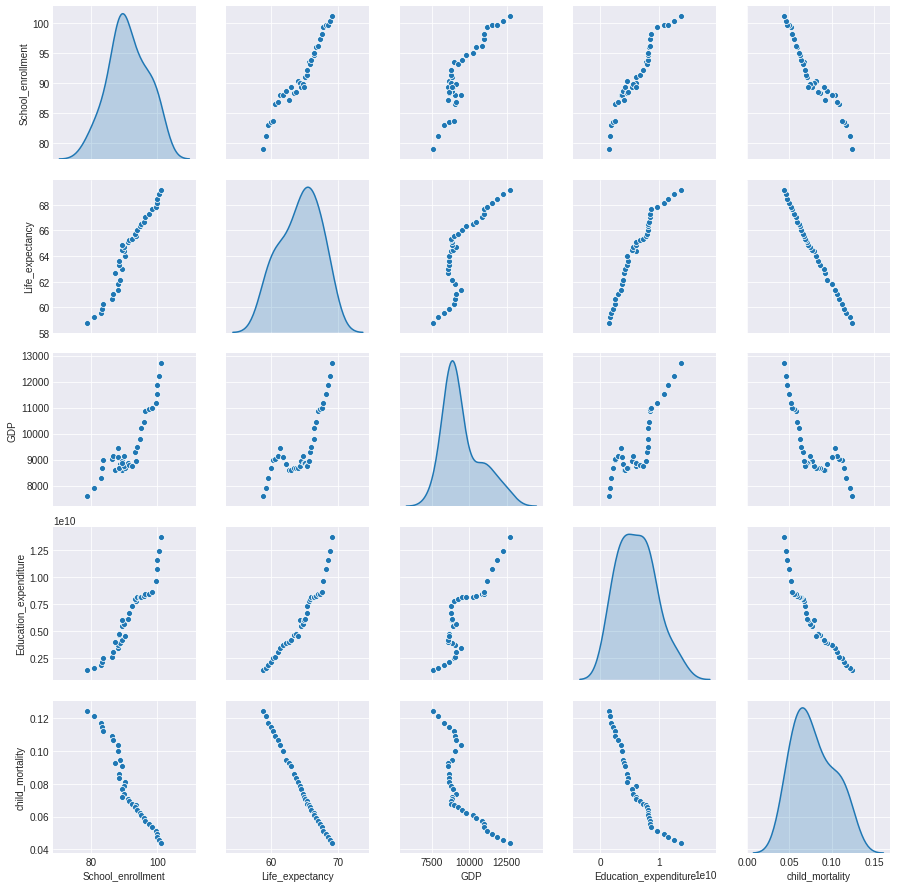

In [77]:
sns.pairplot(world_indicator, vars=['School_enrollment', 'Life_expectancy', 'GDP', 'Education_expenditure', 'child_mortality'], diag_kind="kde");

In [41]:
corr=world_indicator.corr()

In [42]:
corr

,School_enrollment,Life_expectancy,GDP,Education_expenditure,child_mortality
School_enrollment,1.000000,0.972549,0.893779,0.963825,-0.962438
Life_expectancy,0.972549,1.000000,0.815993,0.967764,-0.997921
GDP,0.893779,0.815993,1.000000,0.881788,-0.783640
Education_expenditure,0.963825,0.967764,0.881788,1.000000,-0.955494
child_mortality,-0.962438,-0.997921,-0.783640,-0.955494,1.000000


We see that we have strong correlation between the variables choosen either in a positive way or negative way. So for example we can say that if Education expenditure and School enrollment are positively correlated: if the former increases, the latter is highly likely to increase as well. Instead, scholl enrollment and child mortality are negatively correlated: they show opposite trends. Therefore, since life expectancy is increasing (see previous plot), we could expect a decrease in child mortality. This, however, must not be interpreted as a causal relationship between the indicators. Further analysis would be needed to prove that. 

From our analysis, we can say that the World is doing better (at least according to the chosen indicators). Obviously, ours is a small attempt; to properly answer this questions, we would need to perform a more extensive and in depth-analysis. In particular, we would need to find a way to properly address missing data in the different indicators. Probably the question should be defined better, because indicators could be read in different ways. 



### Prediction with ARIMA model Autoregresive Integrated Moving Average
We attempted to predict the future values of the school enrollment indicator using ARIMA

In [43]:
df_School_enrollment['School_enrollment'].describe().transpose()

count     36.000000
mean      91.220468
std        5.668324
min       78.958427
25%       88.029177
50%       90.181177
75%       95.310856
max      101.184740
Name: School_enrollment, dtype: float64

1) Visualize data

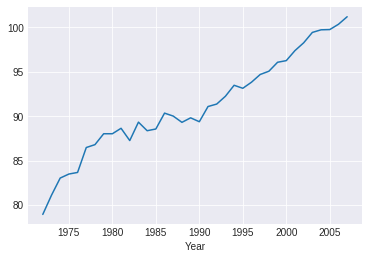

In [45]:
world_indicator['School_enrollment'].plot()
#['School_enrollment']

Non-Seasonal

We are trying to whether to accept the Null Hypothesis H0 (that the time series it is non-stationary) or reject H0 and go with the Alternative Hypothesis (that the time series is stationary).

We end up deciding this based on the p-value return.

   A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

   A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

Augmented Dickey-Fuller test on our data:

In [46]:
from statsmodels.tsa.stattools import adfuller

In [48]:
result = adfuller(world_indicator['School_enrollment'])
result

(-0.9916473471593674,
 0.756298535323037,
 1,
 34,
 {'1%': -3.639224104416853,
  '5%': -2.9512301791166293,
  '10%': -2.614446989619377},
 56.09019233440115)

In [49]:
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


We have to transform it to stationary in order to evaluate what ARIMA model we will use

In [50]:
world_indicator['First Difference']=world_indicator['School_enrollment']-world_indicator['School_enrollment'].shift(1)

In [51]:
result1 = adfuller(world_indicator['First Difference'].dropna())
result1

(-7.710289894128138,
 1.269184896218335e-11,
 0,
 34,
 {'1%': -3.639224104416853,
  '5%': -2.9512301791166293,
  '10%': -2.614446989619377},
 52.08756859857294)

In [52]:
if result1[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


d=1

In [53]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

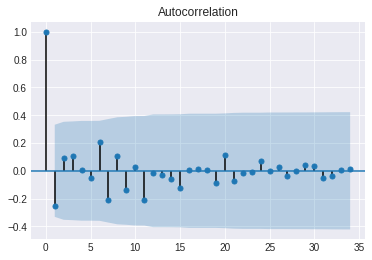

In [54]:
fig_first = plot_acf(world_indicator['First Difference'].dropna())

Sharp Drop-off kind of graph
the PACF plot has a significant spike only at lag 1, meaning that all the higher-order autocorrelations are effectively explained by the lag-1 autocorrelation.
If the stationarized series has positive autocorrelation at lag 1, AR terms often work best.


/home/al1190/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


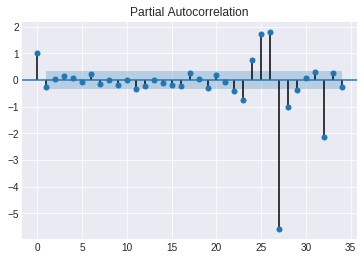

In [55]:
result = plot_pacf(world_indicator['First Difference'].dropna())

In [56]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [57]:
model = sm.tsa.statespace.SARIMAX(world_indicator['School_enrollment'],order=(9,1,3))
results = model.fit()
print(results.summary())

/home/al1190/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:      School_enrollment   No. Observations:                   36
Model:               SARIMAX(9, 1, 3)   Log Likelihood                 -41.980
Date:                Mon, 19 Nov 2018   AIC                            109.959
Time:                        13:55:51   BIC                            130.179
Sample:                             0   HQIC                           116.939
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5554      0.486      1.144      0.253      -0.396       1.507
ar.L2          0.6902      0.637      1.084      0.278      -0.558       1.938
ar.L3         -0.2870      0.614     -0.467      0.6

/home/al1190/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


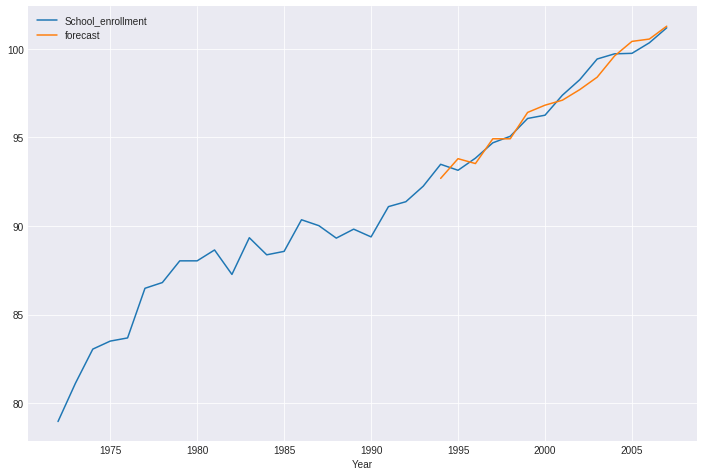

In [59]:
world_indicator['forecast'] = results.predict(start = 22, end= 35)  
world_indicator[['School_enrollment','forecast']].plot(figsize=(12,8));

In [60]:
world_indicator

,School_enrollment,Life_expectancy,GDP,Education_expenditure,child_mortality,First Difference,forecast
Year,,,,,,,
1972,78.958427,58.807436,7592.226677,1.434426e+09,0.124417,NaN,NaN
1973,81.115555,59.247859,7921.617763,1.622570e+09,0.121172,2.157128,NaN
1974,83.046482,59.532222,8310.353163,1.867776e+09,0.117319,1.930927,NaN
1975,83.498224,59.886395,8683.495868,2.164361e+09,0.114982,0.451742,NaN
1976,83.677875,60.251255,8974.536393,2.486034e+09,0.112333,0.179651,NaN
1977,86.480168,60.627226,9038.971256,2.586393e+09,0.109006,2.802294,NaN
1978,86.804157,61.073832,9155.058428,3.045097e+09,0.106599,0.323989,NaN
1979,88.028671,61.370076,9456.717698,3.463577e+09,0.103471,1.224514,NaN
1980,88.029346,61.788581,9088.826266,3.683983e+09,0.100009,0.000675,NaN


In [61]:
from pandas.tseries.offsets import DateOffset

In [62]:
ser2 = pd.Series(range(2007,2019))

In [63]:
future_dates=pd.to_datetime(ser2, format='%Y', errors='ignore')

In [64]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=world_indicator.columns)

In [65]:
future_dates_df

,School_enrollment,Life_expectancy,GDP,Education_expenditure,child_mortality,First Difference,forecast
2008-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
future_dates_df.index = pd.to_datetime(future_dates_df.index, format = '%Y').year

In [67]:
future_dates_df

,School_enrollment,Life_expectancy,GDP,Education_expenditure,child_mortality,First Difference,forecast
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
world_indicator

,School_enrollment,Life_expectancy,GDP,Education_expenditure,child_mortality,First Difference,forecast
Year,,,,,,,
1972,78.958427,58.807436,7592.226677,1.434426e+09,0.124417,NaN,NaN
1973,81.115555,59.247859,7921.617763,1.622570e+09,0.121172,2.157128,NaN
1974,83.046482,59.532222,8310.353163,1.867776e+09,0.117319,1.930927,NaN
1975,83.498224,59.886395,8683.495868,2.164361e+09,0.114982,0.451742,NaN
1976,83.677875,60.251255,8974.536393,2.486034e+09,0.112333,0.179651,NaN
1977,86.480168,60.627226,9038.971256,2.586393e+09,0.109006,2.802294,NaN
1978,86.804157,61.073832,9155.058428,3.045097e+09,0.106599,0.323989,NaN
1979,88.028671,61.370076,9456.717698,3.463577e+09,0.103471,1.224514,NaN
1980,88.029346,61.788581,9088.826266,3.683983e+09,0.100009,0.000675,NaN


In [69]:
future_df = pd.concat([world_indicator,future_dates_df],axis =0)

In [70]:
future_df

,School_enrollment,Life_expectancy,GDP,Education_expenditure,child_mortality,First Difference,forecast
1972,78.958427,58.807436,7592.226677,1.434426e+09,0.124417,NaN,NaN
1973,81.115555,59.247859,7921.617763,1.622570e+09,0.121172,2.157128,NaN
1974,83.046482,59.532222,8310.353163,1.867776e+09,0.117319,1.930927,NaN
1975,83.498224,59.886395,8683.495868,2.164361e+09,0.114982,0.451742,NaN
1976,83.677875,60.251255,8974.536393,2.486034e+09,0.112333,0.179651,NaN
1977,86.480168,60.627226,9038.971256,2.586393e+09,0.109006,2.802294,NaN
1978,86.804157,61.073832,9155.058428,3.045097e+09,0.106599,0.323989,NaN
1979,88.028671,61.370076,9456.717698,3.463577e+09,0.103471,1.224514,NaN
1980,88.029346,61.788581,9088.826266,3.683983e+09,0.100009,0.000675,NaN
1981,88.642806,62.147762,8826.204730,3.940423e+09,0.094657,0.613460,NaN


In [71]:
model = sm.tsa.statespace.SARIMAX(future_df['School_enrollment'],order=(9,1,3))
results = model.fit()
print(results.summary())

/home/al1190/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:      School_enrollment   No. Observations:                   47
Model:               SARIMAX(9, 1, 3)   Log Likelihood                 -41.988
Date:                Mon, 19 Nov 2018   AIC                            109.975
Time:                        13:56:59   BIC                            133.748
Sample:                             0   HQIC                           118.881
                                 - 47                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5571      0.477      1.167      0.243      -0.378       1.492
ar.L2          0.6805      0.637      1.068      0.285      -0.568       1.929
ar.L3         -0.2901      0.620     -0.468      0.6

/home/al1190/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [72]:
future_df['forecast']=results.predict(start=35,end=46)

In [73]:
future_df

,School_enrollment,Life_expectancy,GDP,Education_expenditure,child_mortality,First Difference,forecast
1972,78.958427,58.807436,7592.226677,1.434426e+09,0.124417,NaN,NaN
1973,81.115555,59.247859,7921.617763,1.622570e+09,0.121172,2.157128,NaN
1974,83.046482,59.532222,8310.353163,1.867776e+09,0.117319,1.930927,NaN
1975,83.498224,59.886395,8683.495868,2.164361e+09,0.114982,0.451742,NaN
1976,83.677875,60.251255,8974.536393,2.486034e+09,0.112333,0.179651,NaN
1977,86.480168,60.627226,9038.971256,2.586393e+09,0.109006,2.802294,NaN
1978,86.804157,61.073832,9155.058428,3.045097e+09,0.106599,0.323989,NaN
1979,88.028671,61.370076,9456.717698,3.463577e+09,0.103471,1.224514,NaN
1980,88.029346,61.788581,9088.826266,3.683983e+09,0.100009,0.000675,NaN
1981,88.642806,62.147762,8826.204730,3.940423e+09,0.094657,0.613460,NaN


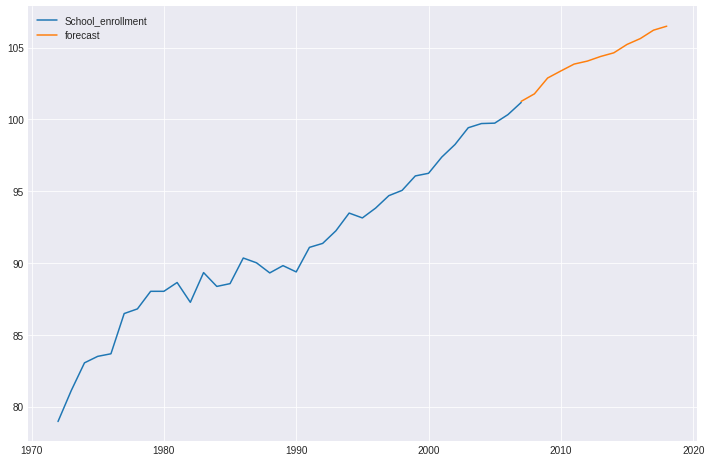

In [75]:
future_df[['School_enrollment','forecast']].plot(figsize=(12,8));

We have tried to apply this prediction with the ARIMA model, and although we are not 100% sure that the application is perfectly correct, it seems that it makes a lot of sense and that it is quite true to reality. In any case we will have to go much deeper into this model to adjust our predictions much more in the future.